# Metrics

## Importar libs e dataset

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [6]:
df = pd.read_csv('iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Preparar e separar dados em treino e teste

In [7]:
scaler = StandardScaler()

data_raw = df.values[:, :-1]
labels = df.values[:, -1]

data = scaler.fit_transform(data_raw)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.9, stratify=labels, random_state=42)

## Criar modelo

In [65]:
model = LogisticRegression(multi_class='auto', solver='lbfgs')
model.fit(X_train, y_train)

y_score = model.predict_proba(X_test)
y_pred = model.predict(X_test)

## Calcular métricas básicas

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred, labels=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
print(conf_matrix)

[[45  0  0]
 [ 0 41  4]
 [ 0  4 41]]


In [63]:
acc          = (conf_matrix[0,0] + conf_matrix[1,1] + conf_matrix[2,2]) / len(y_pred)
virgi_precis = conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[0,2] + conf_matrix[1,2])
virgi_recall = conf_matrix[2,2] / (conf_matrix[2,2] + conf_matrix[2,0] + conf_matrix[2,1])
virgi_f1     = 2 * virgi_precis * virgi_recall / (virgi_precis + virgi_recall)
print("accuracy        = %.2f%%" % (acc * 100))
print("versi precision = %.2f%%" % (virgi_recall * 100))
print("versi recall    = %.2f%%" % (virgi_recall * 100))
print("versi f1 score  = %.2f%%" % (virgi_f1 * 100))

accuracy        = 94.07%
versi precision = 91.11%
versi recall    = 91.11%
versi f1 score  = 91.11%


## Gráfico de ROC

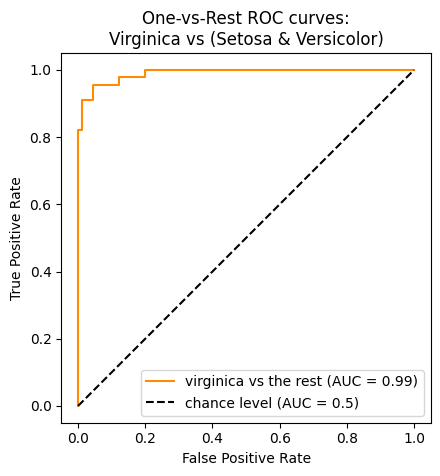

In [68]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)

RocCurveDisplay.from_predictions(
    y_onehot_test[:, 2],
    y_score[:, 2],
    name=f"{'virginica'} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

## Calcular AUC (Area Under Curve)

In [71]:
auc = roc_auc_score(labels, model.predict_proba(data), multi_class='ovr')
print("AUC = %.2f%%" % (auc * 100))

AUC = 99.31%
